In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
def load_data(name, path):
    dataset = []
    data_path = path + name


    c = 0
    for file_name in os.listdir(data_path):
        c += 1
        img = cv2.imread(os.path.join(data_path, file_name))
        img = np.array(img)
        dataset.append(img)
        if c == 250:
            break

    return np.array(dataset)

hr = load_data('hr', 'datasets/simplelines/')


In [4]:
y_train = hr
y_train = y_train.astype('float32') / 255.0

Unneccessary

In [5]:
x_train = tf.image.resize(y_train, (y_train.shape[1] // 2 // 2, y_train.shape[2] // 2 // 2))

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2DTranspose(3, (3, 3), (2, 2), padding="same", use_bias=False, input_shape=(250, 250, 3)),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(3, (3, 3), padding="same", use_bias=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(3, (3, 3), padding="same", use_bias=False),
    tf.keras.layers.Dropout(0.2),
])

In [7]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  (None, 500, 500, 3)      81        
 nspose)                                                         
                                                                 
 up_sampling2d (UpSampling2D  (None, 1000, 1000, 3)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 1000, 1000, 3)     0         
                                                                 
 conv2d (Conv2D)             (None, 1000, 1000, 3)     81        
                                                                 
 dropout_1 (Dropout)         (None, 1000, 1000, 3)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 1000, 1000, 3)     8

In [11]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
model.save_weights("models/CNN/")
model.save("models/CNN/")

INFO:tensorflow:Assets written to: models/CNN/assets


INFO:tensorflow:Assets written to: models/CNN/assets


In [ ]:
pred = np.array(model(x_test[1:1+1:]))


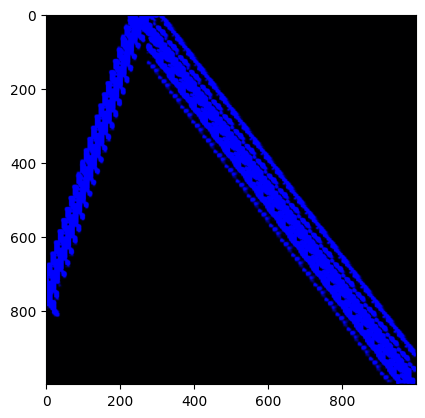

In [ ]:
plt.imshow(pred[0])
plt.show()
